<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/application_model_zoo/Example%20-%20FootBall%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the network

1. Paper on Yolov3: https://arxiv.org/abs/1804.02767

2. Paper on Yolov3-SPP: https://arxiv.org/abs/1903.08589

3. Darknet: https://pjreddie.com/darknet/

4. Blog-1 on yolo: https://machinethink.net/blog/object-detection-with-yolo/

5. Blog-2 on yolo: https://medium.com/@jonathan_hui/real-time-object-detection-with-yolo-yolov2-28b1b93e2088

6. Blog-3 on yolo: https://blog.ekbana.com/training-yolov2-in-a-custom-dataset-6fcf58f65fa2

7. Blog-4 on yolo: https://towardsdatascience.com/yolo-v3-object-detection-53fb7d3bfe6b

8. Blog-5 on yolo: https://blog.insightdatascience.com/how-to-train-your-own-yolov3-detector-from-scratch-224d10e55de2

# Table of contents


## 1. Installattion Instructions



## 2. Use trained model to detect football in images



## 3. How to train using Open Images dataset (Football subset)

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/7_yolov3/installation
     
 - Select the right requirements file and run
 
     - cat requirements.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
! cd Monk_Object_Detection/7_yolov3/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

# For Local systems and cloud select the right CUDA version
# ! cd Monk_Object_Detection/7_yolov3/installation && cat requirements.txt | xargs -n 1 -L 1 pip install

# Use already trained model for demo

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("Monk_Object_Detection/7_yolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [ ]:
# Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1fk92oMydDq5RLpL4y6SG_w7wvbPv1sAS' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1fk92oMydDq5RLpL4y6SG_w7wvbPv1sAS" -O football_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq football_trained.zip

In [ ]:
! mv football_trained/yolov3.cfg .

In [4]:
f = open("football_trained/classes.txt");
class_list = f.readlines();
f.close();

In [6]:
model_name = "yolov3";
weights = "football_trained/last.pt";
gtf.Model(model_name, class_list, weights, use_gpu=True, input_size=416);

Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 980 Ti', total_memory=6080MB)



image 1/1 tmp/img1.jpg: 288x416 1 ball
s, Done. (0.023s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.11_zoo/Monk_Object_Detection/example_notebooks/4_efficientdet/output
Done. (0.071s)


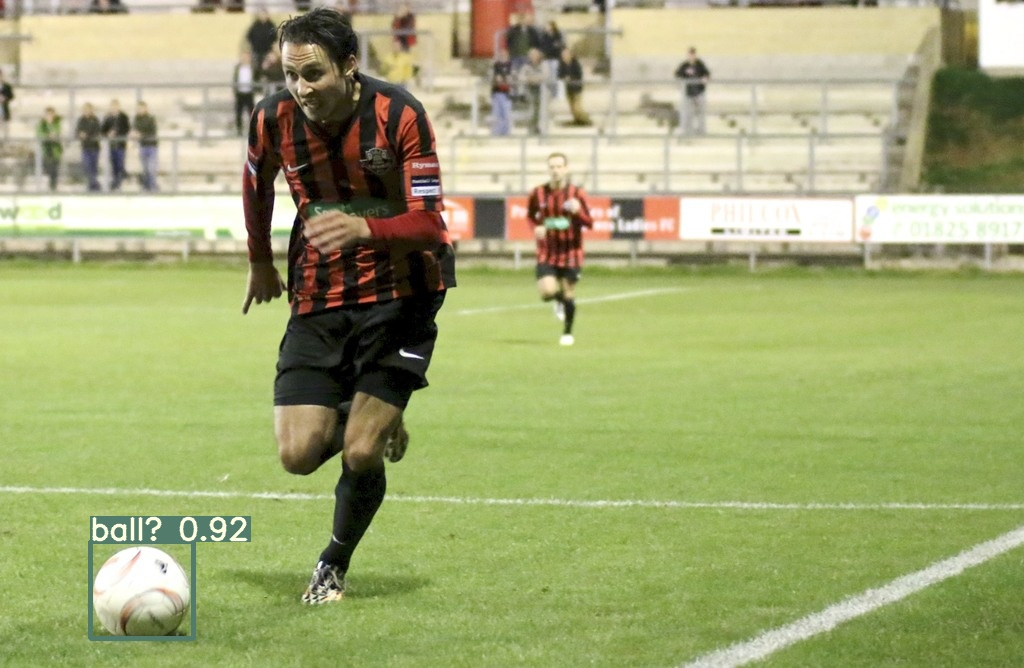

In [8]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/football_test/img1.jpg";
gtf.Predict(img_path, conf_thres=0.4, iou_thres=0.5);
Image(filename='output/img1.jpg')

image 1/1 tmp/img3.jpg: 288x416 1 ball
s, Done. (0.024s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.11_zoo/Monk_Object_Detection/example_notebooks/4_efficientdet/output
Done. (0.079s)


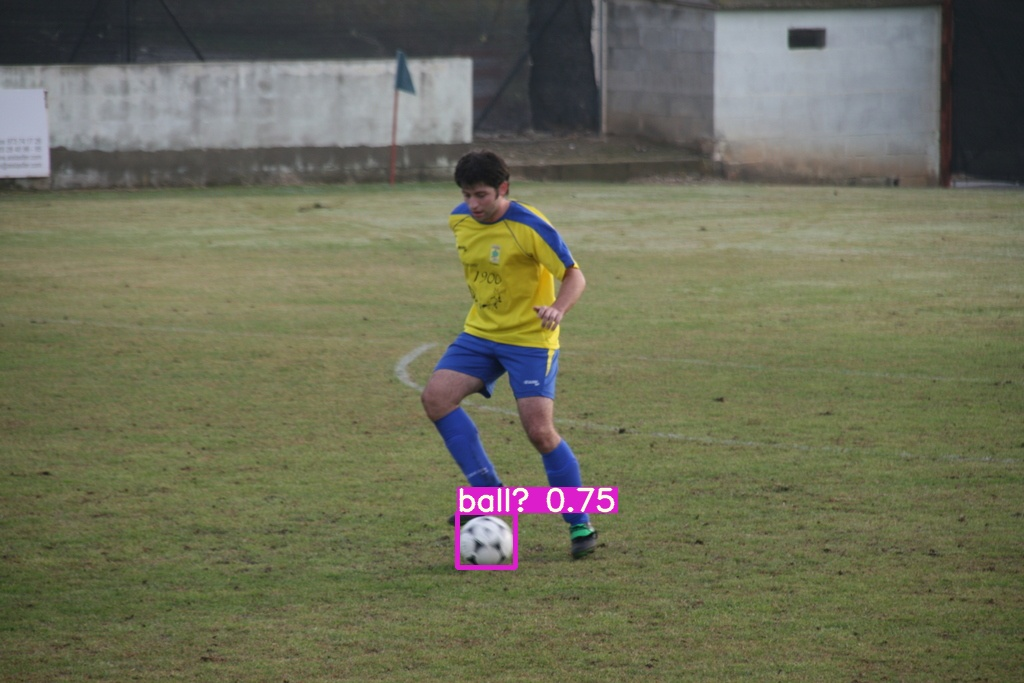

In [11]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/football_test/img3.jpg";
gtf.Predict(img_path, conf_thres=0.4, iou_thres=0.5);
Image(filename='output/img3.jpg')

# Train you own detector

# Dataset credits
 - https://storage.googleapis.com/openimages/web/index.html

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B-zLezrW-A8YEnnB-n5jOGTAA8rVjoVD' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B-zLezrW-A8YEnnB-n5jOGTAA8rVjoVD" -O football.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq football.zip

# Monk Format

## Dataset Directory Structure

    football (root)
          |
          |-----------images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
## Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

# Required Format - Yolo

## Dataset Directory Structure

        football (root)
          |
          |-------------images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |-----------labels (label_dir)
          |              |
          |              |------------------img1.txt
          |              |------------------img2.txt
          |              |------------------.........(and so on)
          |
          |------------classes.txt 
          

## Classes file
 
     List of classes in every new line.
     The order corresponds to the IDs in annotation files
     
     Eg.
          class1               (------------------------------> if will be 0)
          class2               (------------------------------> if will be 1)
          class3               (------------------------------> if will be 2)
          class4               (------------------------------> if will be 3)
          

## Annotation file format

    CLASS_ID BOX_X_CENTER BOX_Y_CENTER WIDTH BOX_WIDTH BOX_HEIGHT
    
    (All the coordinates should be normalized)
    (X coordinates divided by width of image, Y coordinates divided by height of image)
    
    Ex. (One line per bounding box of object in image)
        class_id x1 y1 w h
        class_id x1 y1 w h
        ..... (and so on)
        

# Data Conversion

In [1]:
import os
import sys

In [2]:
root_dir = "football";
img_dir = "images";
anno_file = "train_labels.csv";

In [3]:
labels_dir = "labels";
classes_file = "classes.txt";

In [4]:
labels_dir_relative = root_dir + "/" + labels_dir
if(not os.path.isdir(labels_dir_relative)):
    os.mkdir(labels_dir_relative);

In [5]:
import pandas as pd
df = pd.read_csv( os.path.join(root_dir,anno_file));
len(df)

4339

In [6]:
columns = df.columns
classes = [];
for i in range(len(df)):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    for j in range(len(tmp)//5):
        label = tmp[j*5 + 4];
        if(label not in classes):
            classes.append(label);
classes = sorted(classes)
classes

['ball']

In [7]:
f = open(os.path.join(root_dir, classes_file), 'w');
for i in range(len(classes)):
    f.write(classes[i]);
    f.write("\n");
f.close();

In [8]:
from PIL import Image
from tqdm.notebook import tqdm

In [9]:
for i in tqdm(range(len(df))):
    img_file = df[columns[0]][i];
    labels = df[columns[1]][i];
    tmp = labels.split(" ");
    fname = os.path.join(labels_dir_relative,img_file.split(".")[0] + ".txt")
    img = Image.open(os.path.join(root_dir,img_dir,img_file))
    width, height = img.size
    
    f = open(fname, 'w');
    for j in range(len(tmp)//5):
        x1 = float(tmp[j*5 + 0]);
        y1 = float(tmp[j*5 + 1]);
        x2 = float(tmp[j*5 + 2]);
        y2 = float(tmp[j*5 + 3]);
        label = tmp[j*5 + 4];
        
        x_c = str(((x1 + x2)/2)/width);
        y_c = str(((y1 + y2)/2)/height);
        w = str((x2 - x1)/width);
        h = str((y2 - y1)/height);
        index = str(classes.index(label));
        
        f.write(index + " " + x_c + " " + y_c + " " + w + " " + h);
        f.write("\n");
    f.close();

# Training 

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/7_yolov3/lib");

In [2]:
from train_detector import Detector

In [3]:
gtf = Detector();

In [4]:
# With evolving parameters validation data is required
# As an example we re keeping val data same as train

In [5]:
img_dir = "football/images";
label_dir = "football/labels";
class_list_file = "football/classes.txt"
gtf.set_train_dataset(img_dir, label_dir, class_list_file, batch_size=2)
gtf.set_val_dataset(img_dir, label_dir)

### Availale model types
- "yolov3";
- "yolov3s";
- "yolov3-spp";
- "yolov3-spp3";
- "yolov3-tiny";
- "yolov3-spp-matrix";
- "csresnext50-panet-spp";

In [6]:
gtf.set_model(model_name="yolov3");

### Hyper-params for evolving params
 - Set evolve as True
 - Set num_generations (Total epochs = num_generations*epochs)
 

### Optimizers
 - "sgd"
 - "adam"

In [7]:
gtf.set_hyperparams(optimizer="sgd", lr=0.00579, multi_scale=True, evolve=False);

Using CUDA Apex device0 _CudaDeviceProperties(name='GeForce GTX 980 Ti', total_memory=6080MB)



Caching labels (4339 found, 0 missing, 0 empty, 0 duplicate, for 4339 images): 100%|██████████| 4339/4339 [00:00<00:00, 7459.25it/s]
Caching labels (4339 found, 0 missing, 0 empty, 0 duplicate, for 4339 images): 100%|██████████| 4339/4339 [00:00<00:00, 7488.14it/s]

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
Using 2 dataloader workers
Starting training for 20 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:23<00:00, 13.01it/s]
/home/abhi/.virtualenvs/monk_obj_7_yolov3/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:113: UserWarning: Seems like `optimizer.step()` has been overridden after learning rate scheduler initialization. Please, make sure to call `optimizer.step()` before `lr_scheduler.step()`. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


                 all  4.34e+03   5.1e+03     0.893    0.0261    0.0237    0.0507

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:30<00:00, 11.97it/s]


                 all  4.34e+03   5.1e+03     0.428     0.342     0.243      0.38

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:32<00:00, 11.67it/s]


                 all  4.34e+03   5.1e+03     0.474     0.483     0.421     0.479

Model Bias Summary:    layer        regression        objectness    classification
                          82      -0.09+/-0.12      -5.62+/-0.22      -5.00+/-0.00 
                          94      -0.13+/-0.28      -5.77+/-0.20      -5.00+/-0.03 
                         106       0.07+/-0.20      -6.30+/-0.03      -5.00+/-0.05 

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:33<00:00, 11.58it/s]


                 all  4.34e+03   5.1e+03      0.58     0.497     0.452     0.535

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:32<00:00, 11.69it/s]


                 all  4.34e+03   5.1e+03     0.684     0.519     0.483      0.59

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:33<00:00, 11.57it/s]


                 all  4.34e+03   5.1e+03     0.609     0.551     0.515     0.579

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:34<00:00, 11.53it/s]


                 all  4.34e+03   5.1e+03      0.64     0.569     0.531     0.602

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:34<00:00, 11.53it/s]


                 all  4.34e+03   5.1e+03     0.666     0.594     0.558     0.628

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:35<00:00, 11.37it/s]


                 all  4.34e+03   5.1e+03      0.52     0.644     0.601     0.576

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:34<00:00, 11.44it/s]


                 all  4.34e+03   5.1e+03     0.653     0.634     0.598     0.643

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:34<00:00, 11.44it/s]


                 all  4.34e+03   5.1e+03     0.702     0.649     0.609     0.674

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.30it/s]


                 all  4.34e+03   5.1e+03     0.538     0.695     0.646     0.606

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:34<00:00, 11.43it/s]


                 all  4.34e+03   5.1e+03     0.541     0.634     0.504     0.584

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:35<00:00, 11.31it/s]


                 all  4.34e+03   5.1e+03      0.48     0.691     0.566     0.566

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:35<00:00, 11.36it/s]


                 all  4.34e+03   5.1e+03     0.647     0.688      0.65     0.667

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.28it/s]


                 all  4.34e+03   5.1e+03     0.561     0.701     0.655     0.623

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.26it/s]


                 all  4.34e+03   5.1e+03     0.393     0.711     0.501     0.506

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.28it/s]


                 all  4.34e+03   5.1e+03     0.676     0.742     0.713     0.708

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.25it/s]


                 all  4.34e+03   5.1e+03     0.657     0.762      0.73     0.706

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


               Class    Images   Targets         P         R   mAP@0.5        F1:   0%|          | 0/1085 [00:00<?, ?it/s]

               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|██████████| 1085/1085 [01:36<00:00, 11.25it/s]


                 all  4.34e+03   5.1e+03     0.661     0.766     0.733     0.709
20 epochs completed in 3.615 hours.



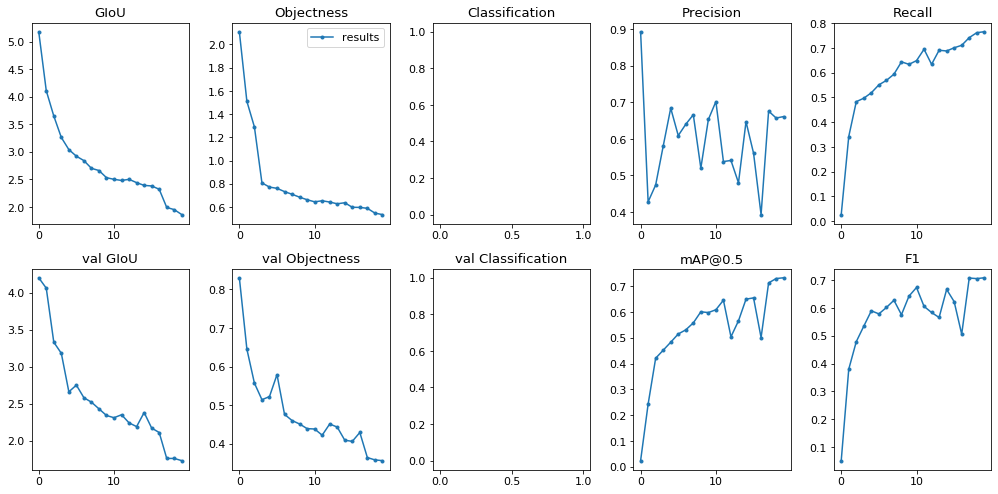

In [8]:
gtf.Train(num_epochs=20);

# Inference

In [1]:
import os
import sys
from IPython.display import Image
sys.path.append("Monk_Object_Detection/7_yolov3/lib");

In [2]:
from infer_detector import Infer

In [3]:
gtf = Infer();

In [4]:
f = open("football/classes.txt");
class_list = f.readlines();
f.close();

In [5]:
model_name = "yolov3";
weights = "weights/last.pt";
gtf.Model(model_name, class_list, weights, use_gpu=True, input_size=416);

Using CUDA device0 _CudaDeviceProperties(name='GeForce GTX 980 Ti', total_memory=6080MB)



image 1/1 tmp/img1.jpg: 288x416 1 ball
s, Done. (0.028s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.061s)


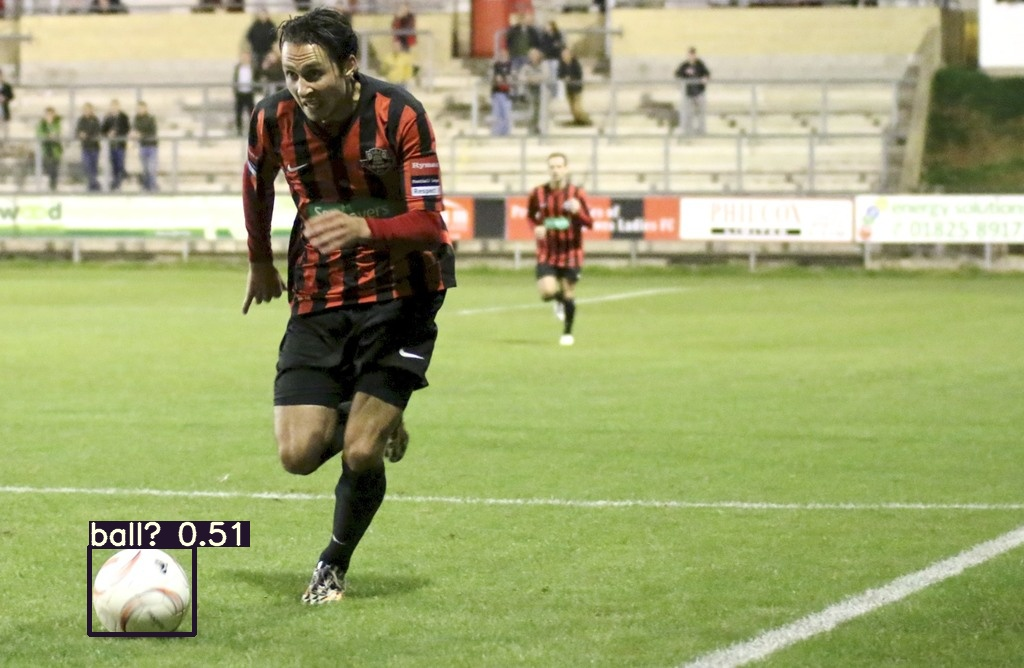

In [23]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/football_test/img1.jpg";
gtf.Predict(img_path, conf_thres=0.4, iou_thres=0.5);
Image(filename='output/img1.jpg') 

image 1/1 tmp/img2.jpg: 416x352 1 ball
s, Done. (0.028s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.070s)


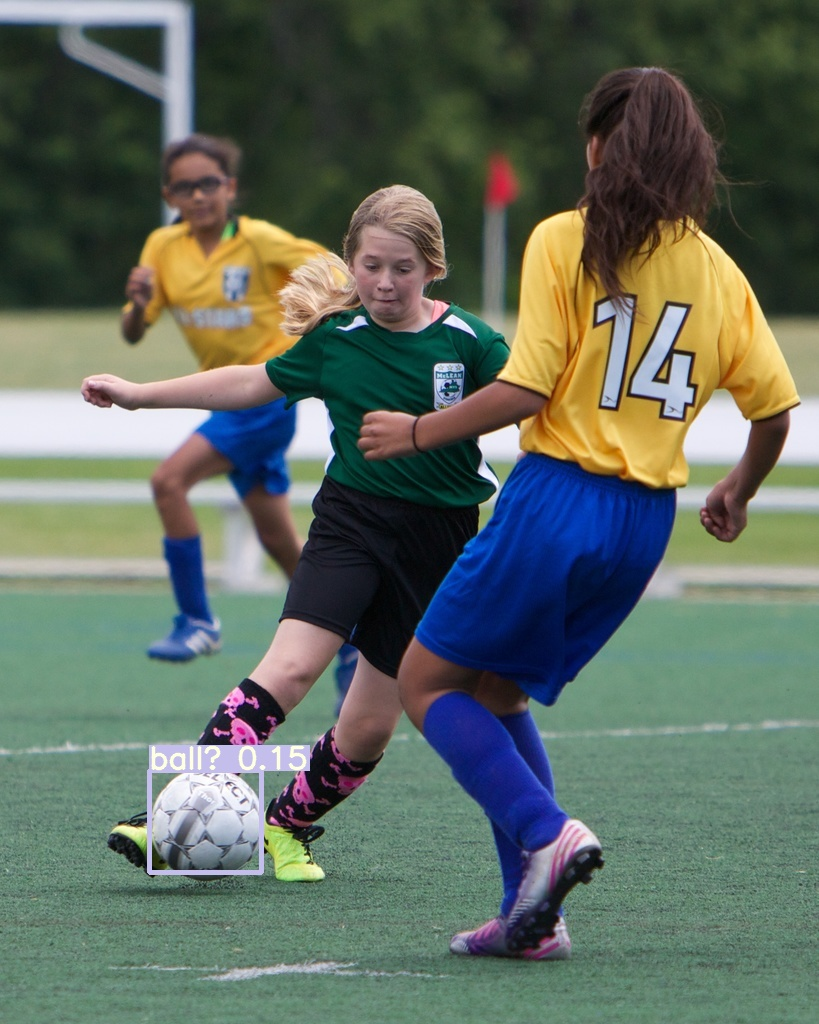

In [27]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/football_test/img2.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img2.jpg') 

image 1/1 tmp/img3.jpg: 288x416 1 ball
s, Done. (0.033s)
Results saved to /home/abhi/Desktop/Work/tess_tool/gui/v0.3/obj_det_models/Organization/v0.9_yolov3/example_notebooks/7_yolov3/output
Done. (0.073s)


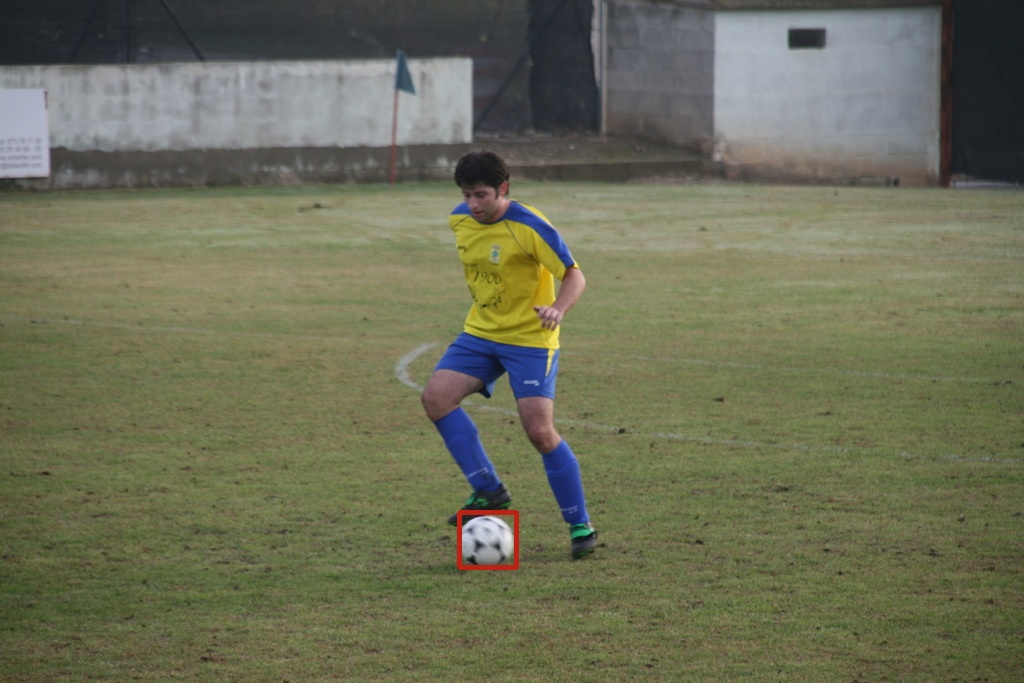

In [15]:
img_path = "Monk_Object_Detection/example_notebooks/sample_dataset/football_test/img3.jpg";
gtf.Predict(img_path, conf_thres=0.1, iou_thres=0.5);
Image(filename='output/img3.jpg') 